# Matplotlib y Seaborn

### Objetivo de la Clase

**Capacitar a los estudiantes en el uso de Matplotlib y Seaborn para la visualización de datos, enfocándose en la presentación de estadísticas y resultados en la ciencia de datos.**

---

### Agenda

### 1. Introducción

- **Importancia de la visualización de datos**
    - Explicar cómo una buena visualización puede revelar insights que no son obvios solo con estadísticas.
- **Breve introducción a Matplotlib y Seaborn**
    - Matplotlib es más customizable pero más verboso.
    - Seaborn es más fácil de usar y estéticamente más agradable pero menos customizable.

### 2. Matplotlib Básico 

- **Instalación y configuración**

In [1]:
# !pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


- **Creación de gráficos simples**
    - Gráfico de líneas:

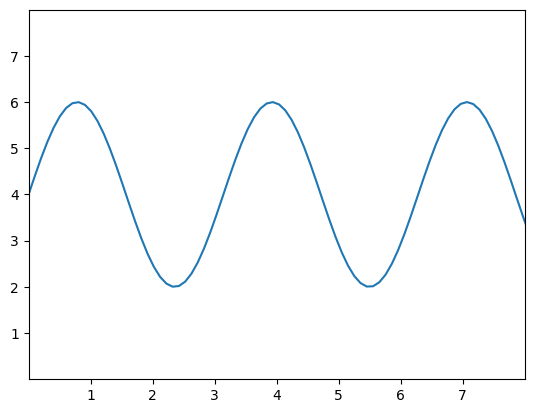

In [2]:
x = np.linspace(0,10,100)
y = 4+2*np.sin(2*x)
plt.plot(x,y)
plt.xlim(0,8)
plt.ylim(0,8)
plt.xticks(np.arange(1,8))
plt.yticks(np.arange(1,8))
plt.show()

- Gráfico de barras:

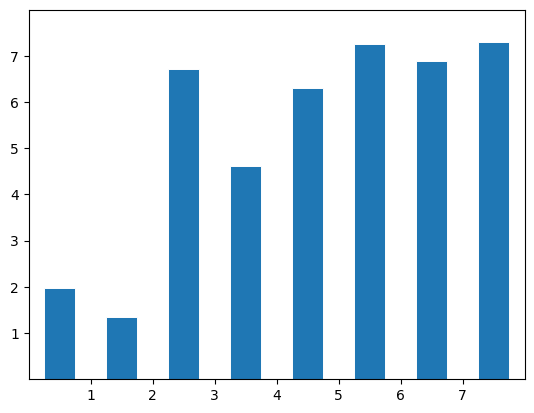

In [3]:
x = 0.5 + np.arange(8)
y = np.random.random(8)*8

plt.bar(x,y, width=0.5, edgecolor = "white", linewidth = 0.7)
plt.xlim(0, 8)
plt.xticks(np.arange(1, 8))
plt.ylim(0, 8)
plt.yticks(np.arange(1, 8))
plt.show()

* Histogramas

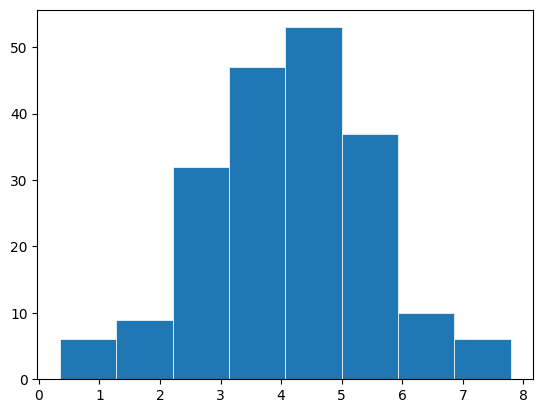

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

plt.hist(x, bins=8, linewidth=0.5, edgecolor="white")
plt.show()

- **Personalización de gráficos**
    - Colores, etiquetas, títulos:

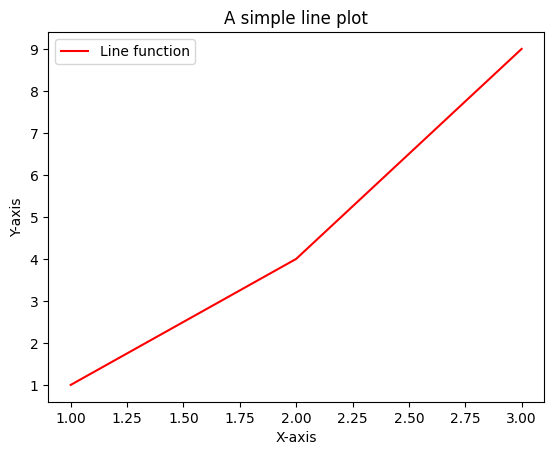

In [5]:

plt.plot([1, 2, 3], [1, 4, 9], label='Line function', color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('A simple line plot')
plt.legend()
plt.show()

### 4. Seaborn Básico 

- **Instalación y configuración**

In [6]:
# !pip install seaborn
import seaborn as sns
tips = sns.load_dataset("tips")

- **Gráficos de distribución**
    - Histogramas

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


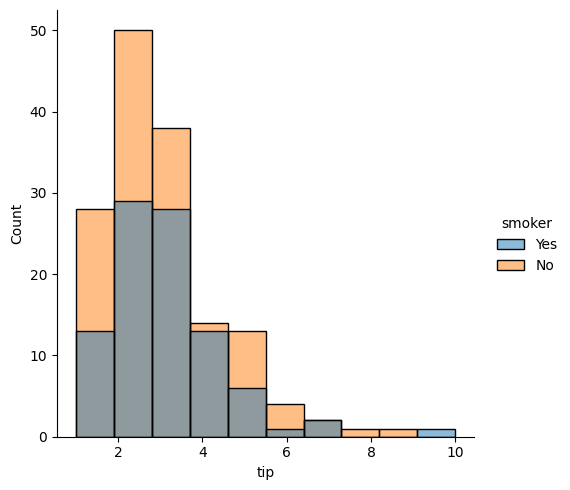

In [7]:
sns.displot(tips, x="tip" , bins = 10, hue = "smoker")

* KDE (Estimación de densidad)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


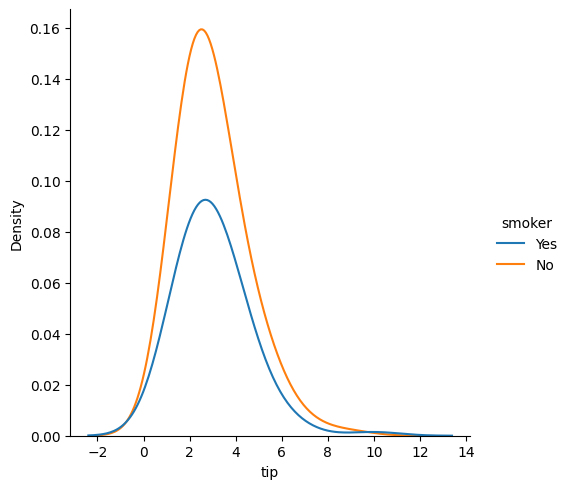

In [8]:
sns.displot(tips, x="tip" ,  hue = "smoker", kind = "kde", bw_adjust = 2)


/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


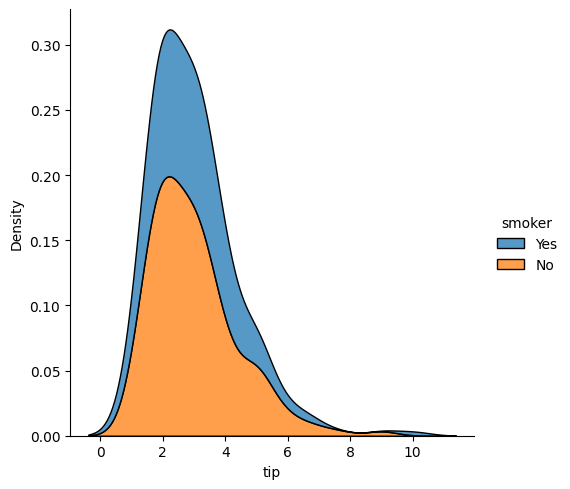

In [9]:
sns.displot(tips, x="tip" ,  hue = "smoker", kind = "kde", bw_adjust = 1, multiple = "stack")


- **Gráficos categóricos**

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


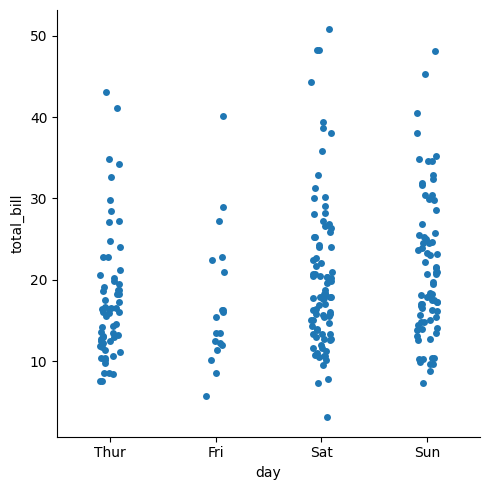

In [15]:
sns.catplot(tips, x="day", y = "total_bill")

- Box plot:

<Axes: xlabel='day', ylabel='total_bill'>

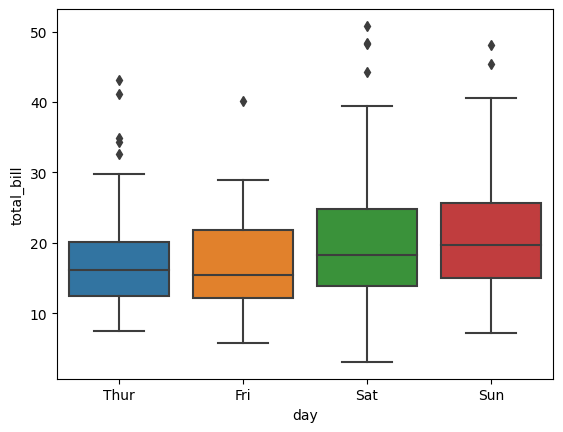

In [16]:
sns.boxplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

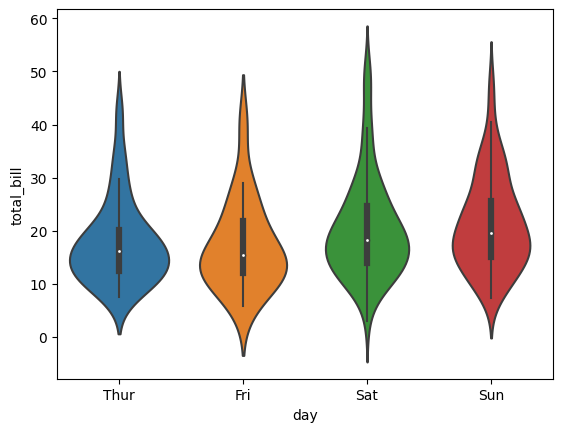

In [17]:
sns.violinplot(x="day", y="total_bill", data=tips)

- **Ventajas de Seaborn sobre Matplotlib**
    - Estilos predefinidos.
    - Integración más fácil con pandas DataFrame.

### 5. Casos de Uso en Ciencia de Datos 

- **Visualizar distribuciones estadísticas**
    - Histograma:

<Axes: xlabel='total_bill', ylabel='Count'>

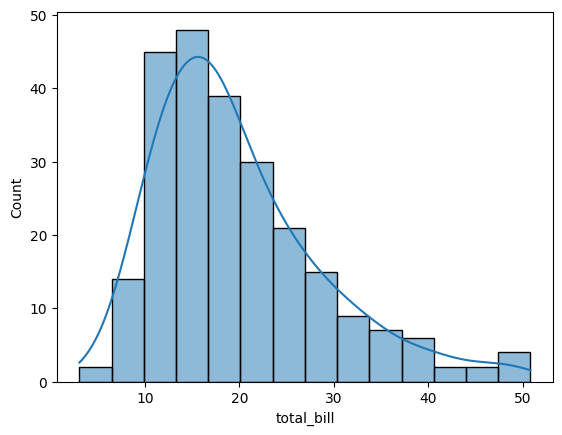

In [41]:
sns.histplot(data=tips, x="total_bill", kde=True)

- **Visualización de correlaciones**
    - Matriz de correlación:

<Axes: >

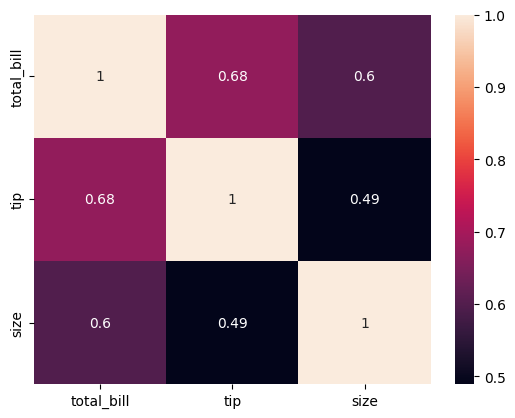

In [43]:
correlation_matrix = tips.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)




## Ejemplo
En el siguiente ejemplo usaremos el dataset de `tips`

### Descripción
Un camarero registró información sobre cada propina que recibió durante un Período de unos meses trabajando en un restaurante. 

Recogió las siguientes Variables:

propina en dólares,

factura en dólares,

sexo del pagador de la factura,

si había fumadores en la fiesta,

día de la semana,

hora del día,

tamaño de la fiesta.

En total registró 244 consejos. Los datos fueron reportados en una colección de estudios de caso para estadísticas empresariales (Bryant & Smith 1995).


In [45]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


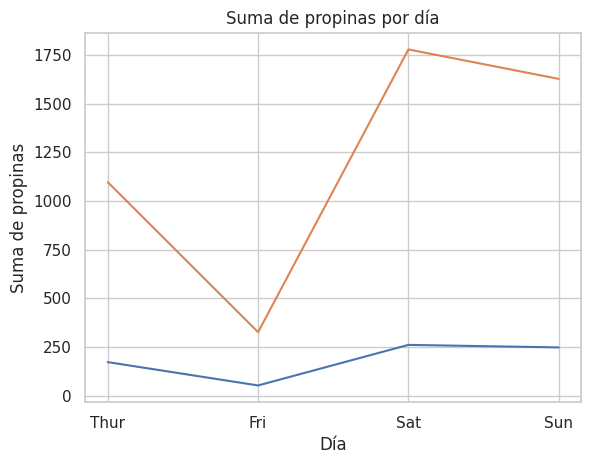

In [58]:
# Graficando la suma de propinas por día
grouped_by_day = df[["day","tip","total_bill"]].groupby('day').sum().reset_index()

plt.plot(grouped_by_day['day'], grouped_by_day['tip'])
plt.plot(grouped_by_day['day'], grouped_by_day['total_bill'])
plt.title('Suma de propinas por día')
plt.xlabel('Día')
plt.ylabel('Suma de propinas')
plt.show()


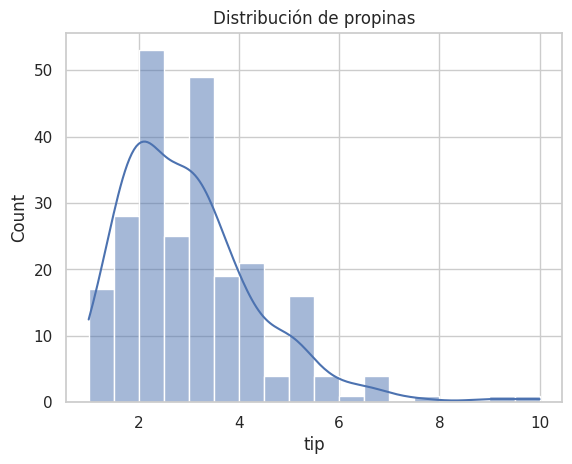

In [69]:
sns.histplot(df['tip'], kde=True)
plt.title('Distribución de propinas')
plt.show()

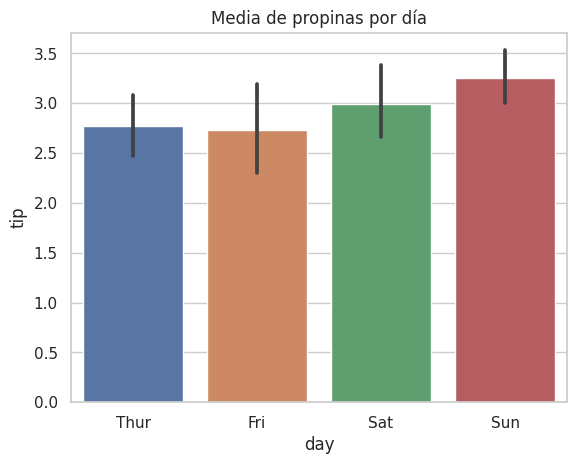

In [70]:
sns.barplot(x='day', y='tip', data=df)
plt.title('Media de propinas por día')
plt.show()

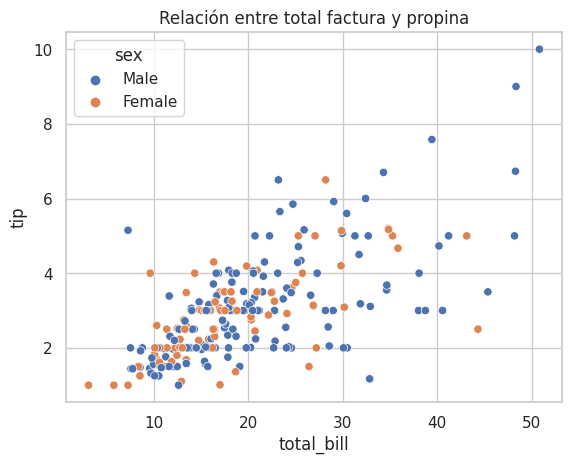

In [71]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex')
plt.title('Relación entre total factura y propina')
plt.show()


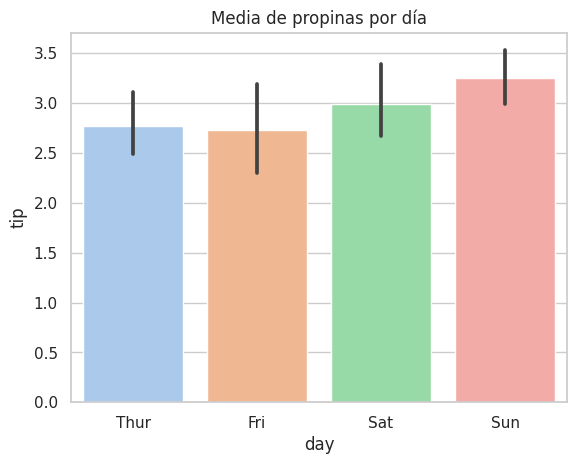

In [78]:
sns.set_palette('pastel')
sns.barplot(x='day', y='tip', data=df)
plt.title('Media de propinas por día')
plt.show()

**Representaciones multiples**

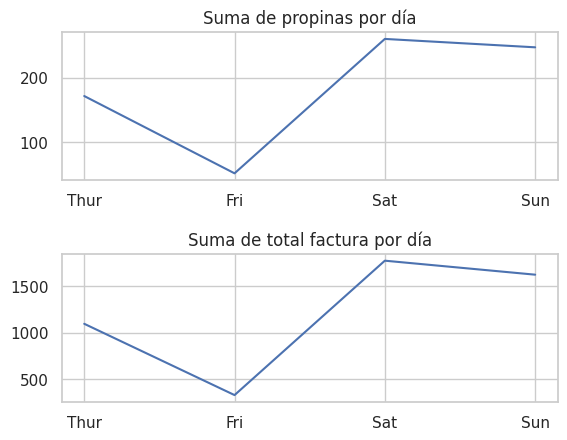

In [68]:
fig, axs = plt.subplots(2)
axs[0].plot(grouped_by_day['day'], grouped_by_day['tip'])
axs[0].set_title('Suma de propinas por día')
axs[1].plot(grouped_by_day['day'], grouped_by_day['total_bill'])
axs[1].set_title('Suma de total factura por día')
plt.subplots_adjust(hspace=0.5)
plt.savefig('suma_de_propinas.png')
plt.show()

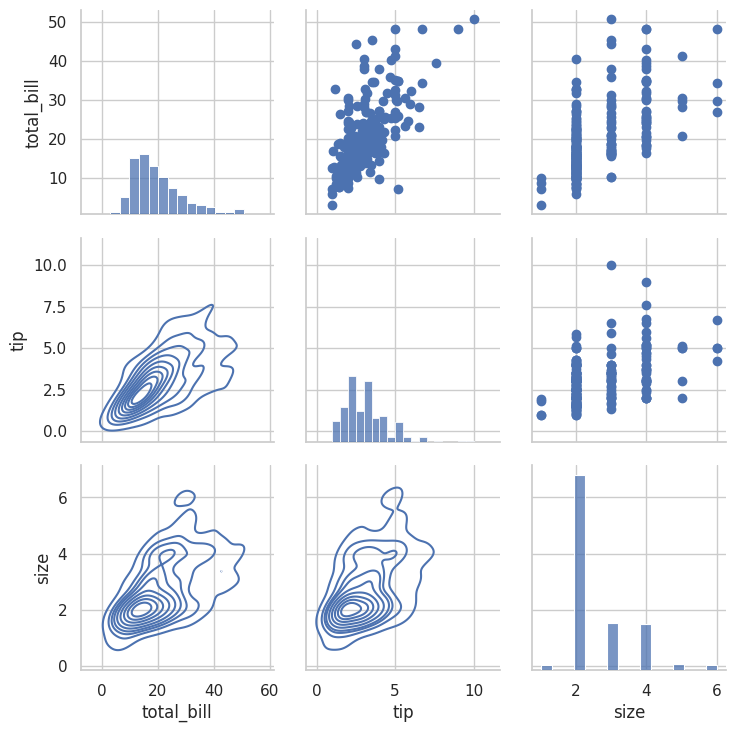

In [65]:
g = sns.PairGrid(df)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.histplot)

/home/dancastarod/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


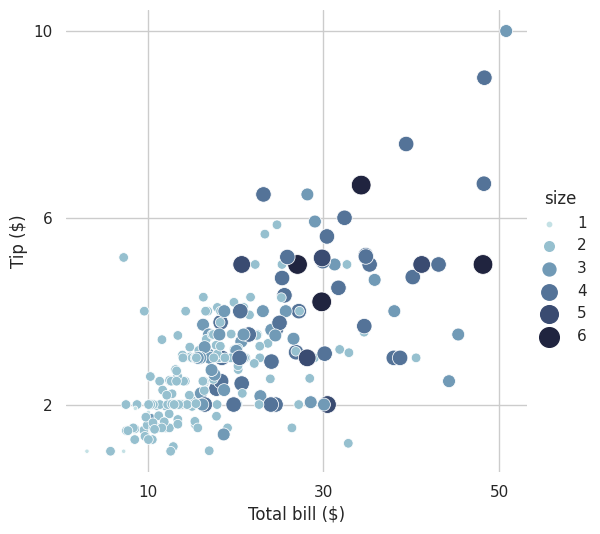

In [54]:
sns.set(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x='total_bill', y='tip', hue='size', 
    size='size', sizes=(10, 200),
    palette=cmap, height=5.5, aspect=1
)

g.set_axis_labels("Total bill ($)", "Tip ($)")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.despine(left=True, bottom=True)
